# ***Import libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Load Bank Personal Loan Modelling dataset & explore***

Dữ liệu được lấy từ https://www.kaggle.com/teertha/personal-loan-modeling

In [3]:
loan_dataset = pd.read_csv('Loan_Modelling_Thera_Bank.csv')
loan_dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
loan_dataset.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
loan_dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# ***Data visualization***

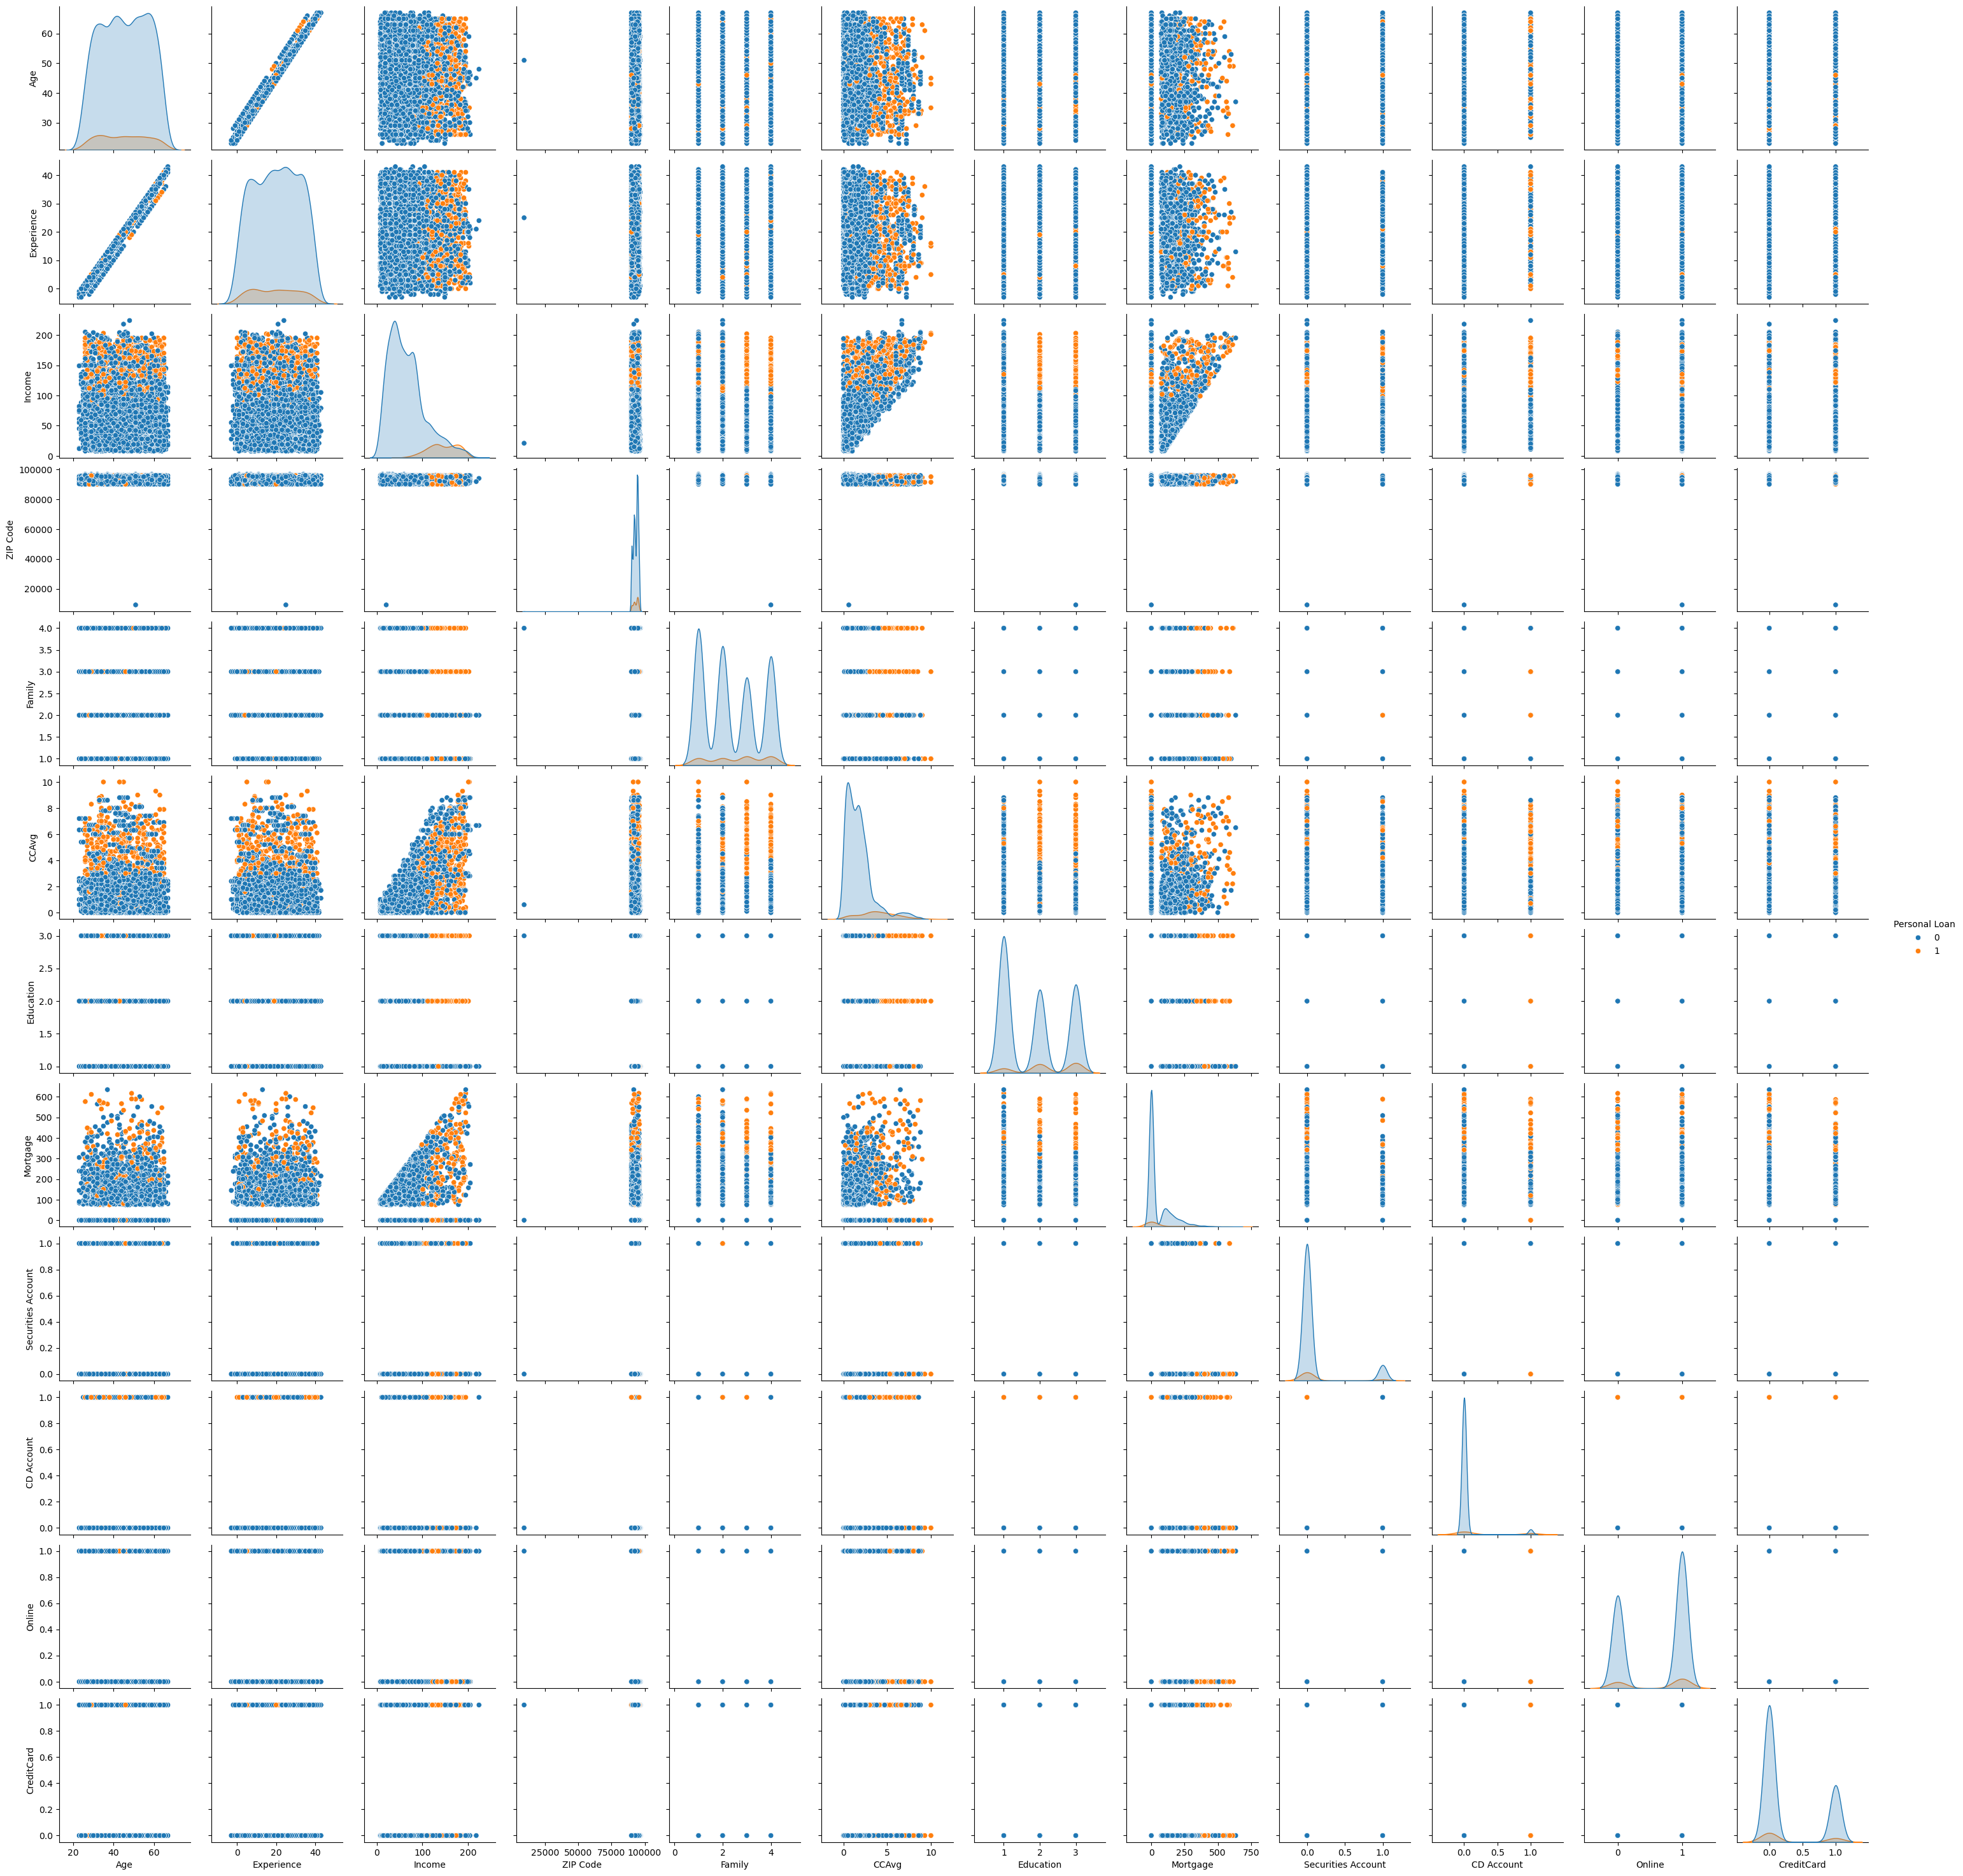

In [7]:
sns.pairplot(loan_dataset,
             hue='Personal Loan',
             vars=['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
                   'Education', 'Mortgage', 'Securities Account',
                   'CD Account', 'Online', 'CreditCard'])

<Axes: ylabel='count'>

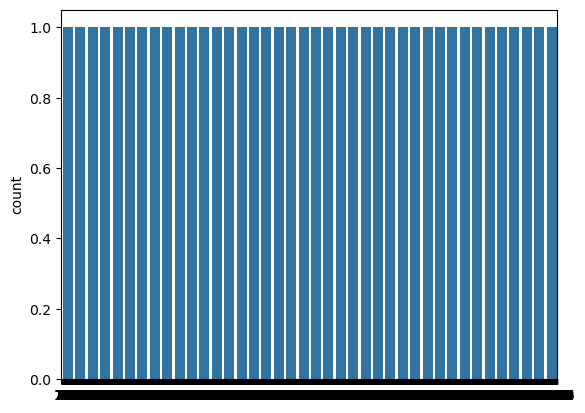

In [8]:
sns.countplot(loan_dataset['Personal Loan'])

<Axes: >

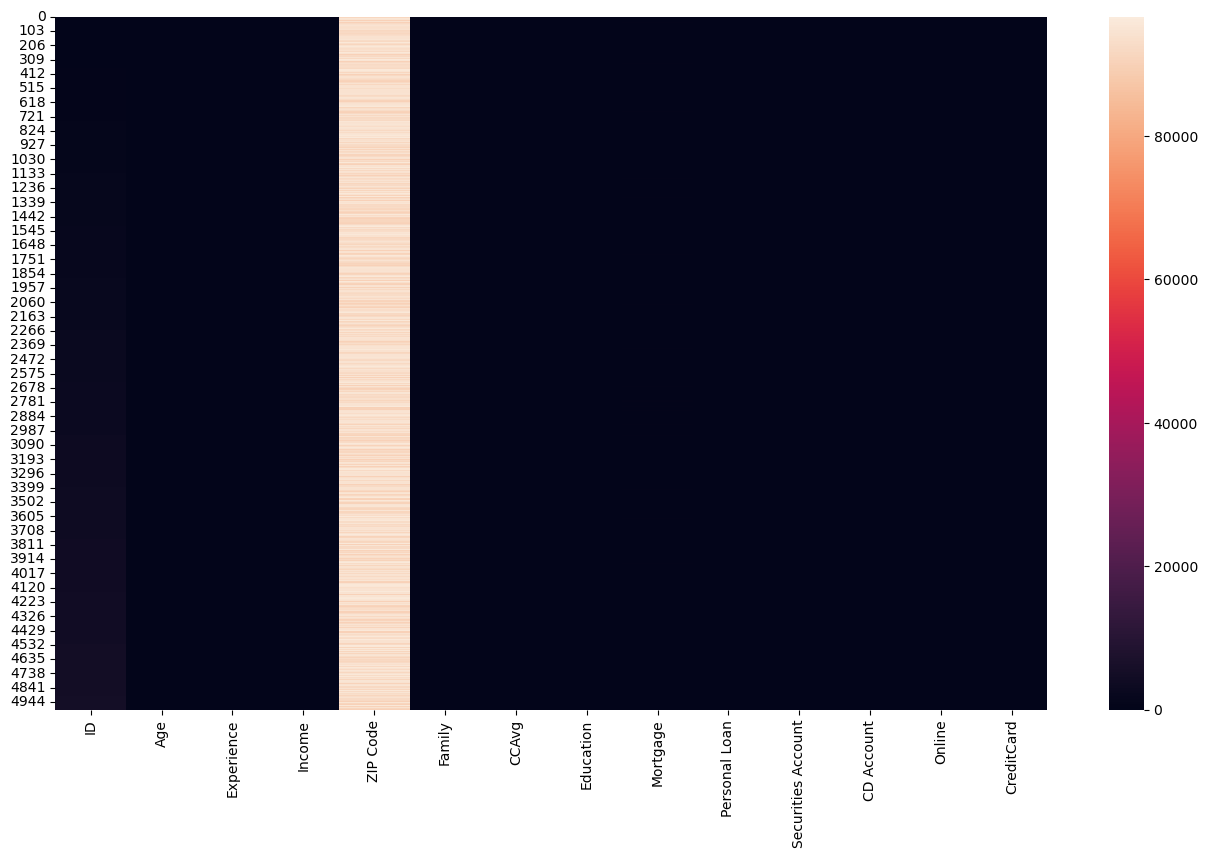

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(loan_dataset)

<Axes: >

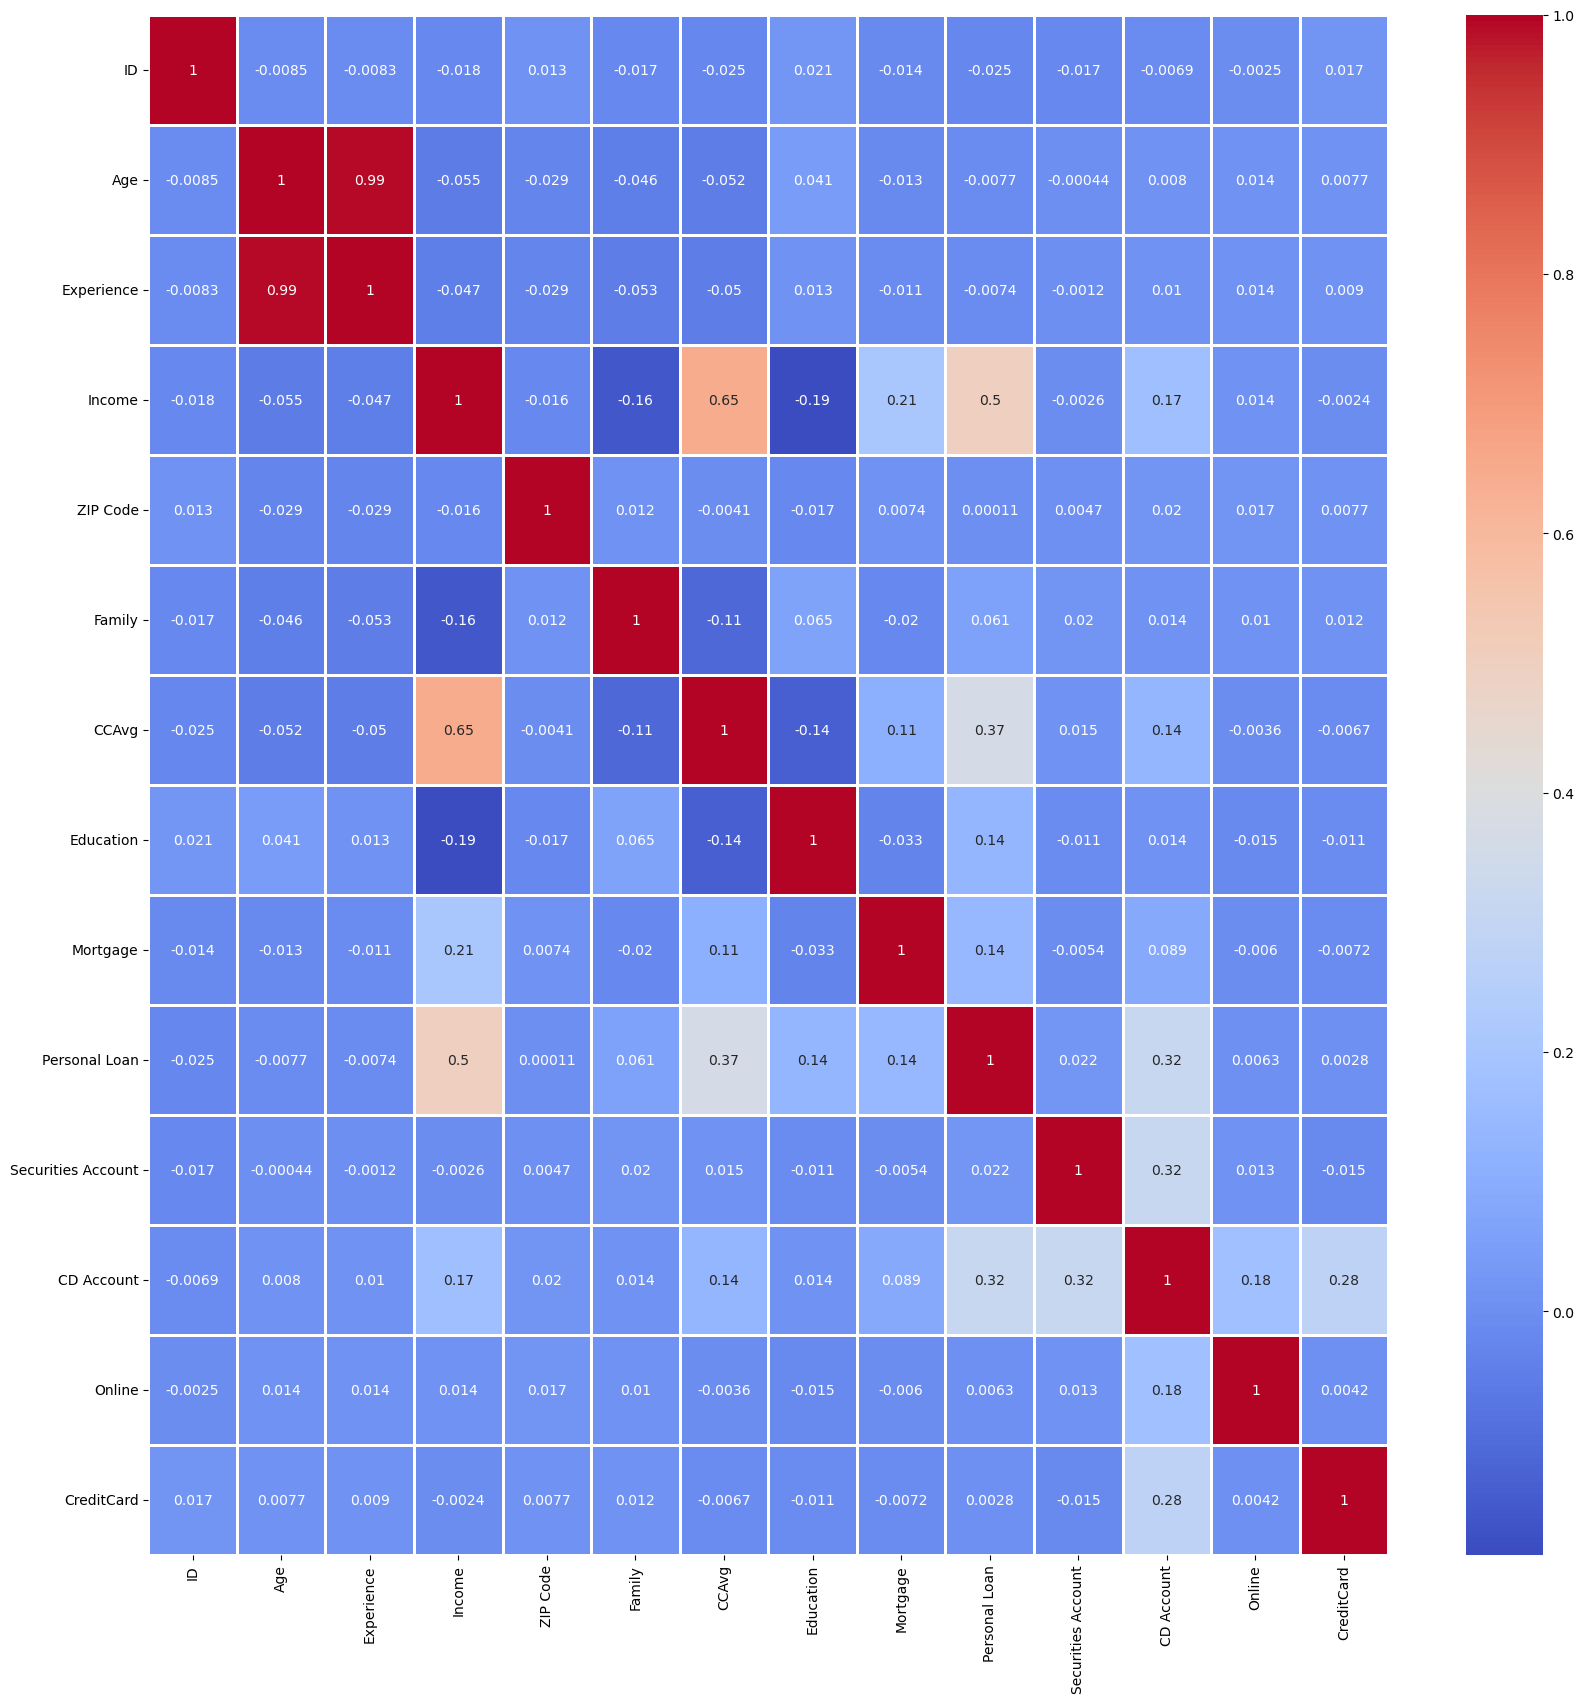

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_dataset.corr(), annot=True, cmap='coolwarm', linewidths=2)

# ***Data preprocessing***

***Normalization***

In [11]:
X = loan_dataset.drop(['Personal Loan', 'ID'], axis=1)
# X = (X-X.mean())/X.var()
X = (X-X.min())/(X.max()-X.min())
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,1.0,0.0
4996,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,1.0,0.0
4997,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0
4998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,1.0,0.0


In [12]:
X.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.507691,0.502274,0.304510,0.959946,0.465467,0.193794,0.440500,0.088974,0.104400,0.06040,0.596800,0.294000
std,0.260526,0.249303,0.213119,0.024293,0.382554,0.174766,0.419935,0.160179,0.305809,0.23825,0.490589,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.272727,0.282609,0.143519,0.945732,0.000000,0.070000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.500000,0.259259,0.963203,0.333333,0.150000,0.500000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.727273,0.717391,0.416667,0.976610,0.666667,0.250000,1.000000,0.159055,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

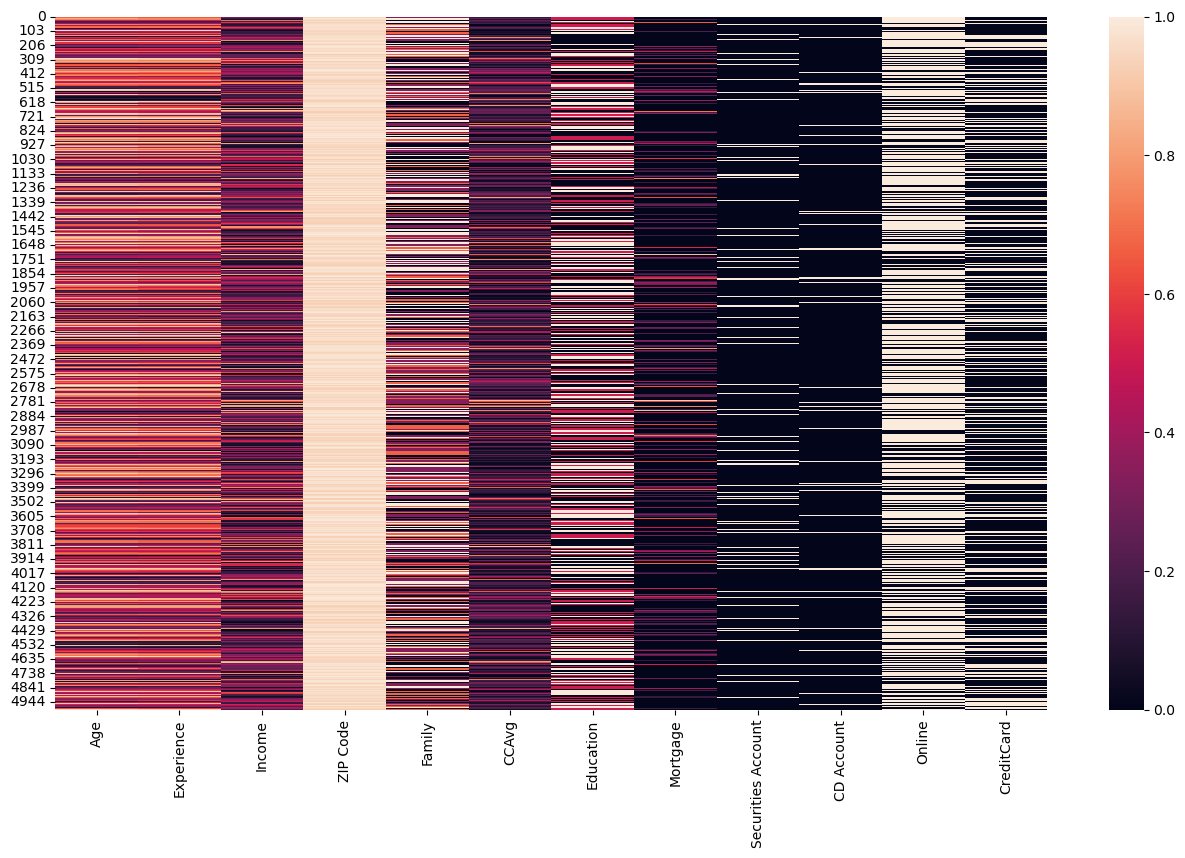

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(X)

In [15]:
y = loan_dataset['Personal Loan']
y.unique()

array([0, 1], dtype=int64)

## Chia dữ liệu làm 2 phần training và testing

- Training chiếm 80 % dữ liệu
- Testing chiếm 20 % dữ liệu

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("Dữ liệu training = ", X_train.shape, y_train.shape)
print("Dữ liệu testing = ", X_test.shape, y_test.shape)

Dữ liệu training =  (4000, 12) (4000,)
Dữ liệu testing =  (1000, 12) (1000,)


# ***Personal Loan Modeling***

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

# ***K - Nearest Neightbor Classifier***

# Bài toán phân loại sử dụng KNN

Mục tiêu:

- Xây dựng được mô hình KNN sử dụng thư viện sklearn.
- Ứng dụng, hiểu cách áp dụng mô hình KNN vào giải quyết bài toán thực tế (vd: phân loại)
- Sử dụng độ đo Accuracy, Precision, Recall để làm độ đo đánh giá chất lượng mô hình.

Bài toán:
- Input: 1 mẫu dữ liệu $X = [x_1, x_2, ... x_n]$
- Output: nhãn $y$ là 0 hoặc 1

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# **1.** Mô hình KNN
Sử dụng thư viện sklearn để xây dựng mô hình
- `KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)`
- Số láng giềng: n_neighbors = 5
- Độ đo khoảng cách: Euclide p = 2

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, weights = 'distance')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

# **2.** Testing KNN model

## Đánh giá theo các độ đo

In [20]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Testing...\n")
y_pred_knn = knn_classifier.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))

Testing...

Accuracy:  0.952
Precision:  0.9166666666666666
Recall:  0.5


# **3.** Lựa chọn mô hình

## Lựa chọn số lượng láng giềng
- Thay đổi số lượng láng riềng tìm giá trị cho kết quả phân loại tốt nhất

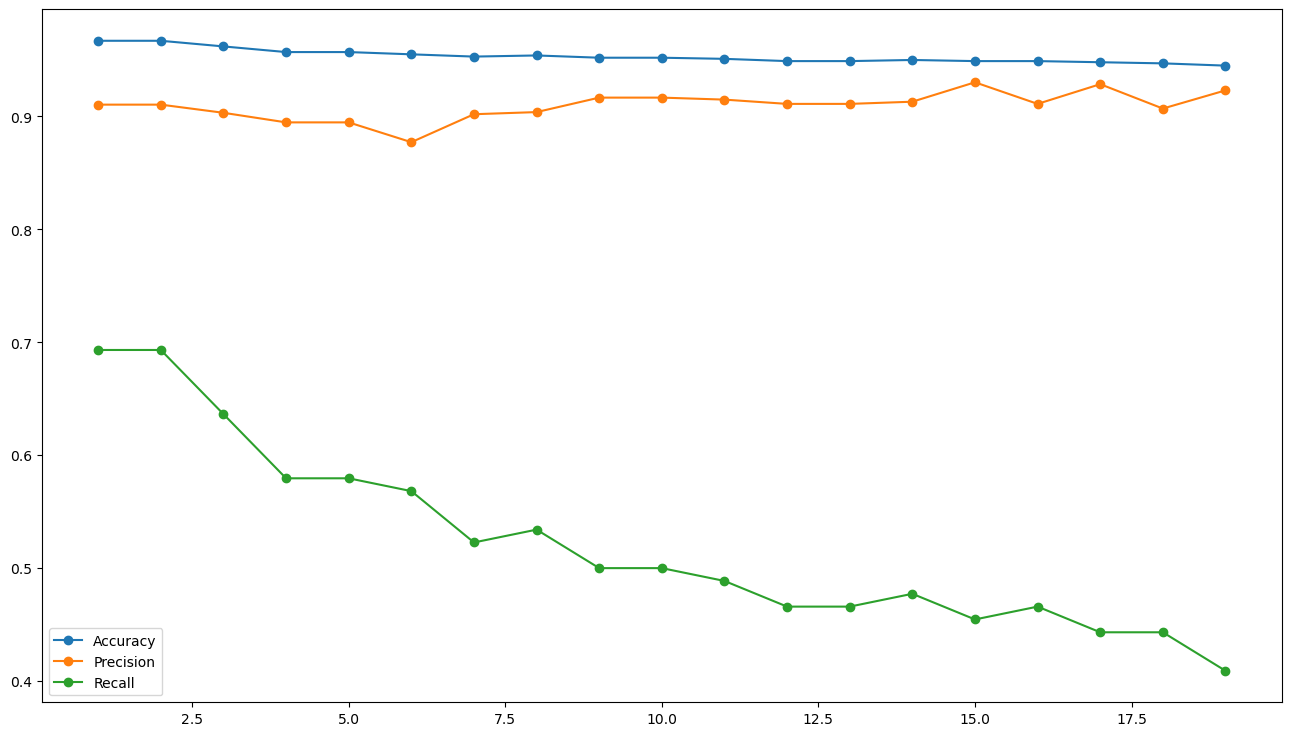

In [23]:
k_list = range(1, 20)
accuracies = []
precisions = []
recalls = []
for k in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_knn))
    precisions.append(precision_score(y_test, y_pred_knn))
    recalls.append(recall_score(y_test, y_pred_knn))

plt.figure(figsize=(16,9))
plt.plot(k_list, accuracies, label='Accuracy', marker='o')
plt.plot(k_list, precisions, label='Precision', marker='o')
plt.plot(k_list, recalls, label='Recall', marker='o')
plt.legend()
plt.show()

k_best = k_list[np.argmax(accuracies)]

## Lựa chọn thuộc tính
- Các thuộc tính: 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'.
- Thử loại bỏ từng thuộc tính ra khỏi dữ liệu xem chúng ảnh hưởng như thế nào tới kết quả phân loại.
- Các thuộc tính nào nên được sử dụng để cho kết quả phân loại tốt nhất ?

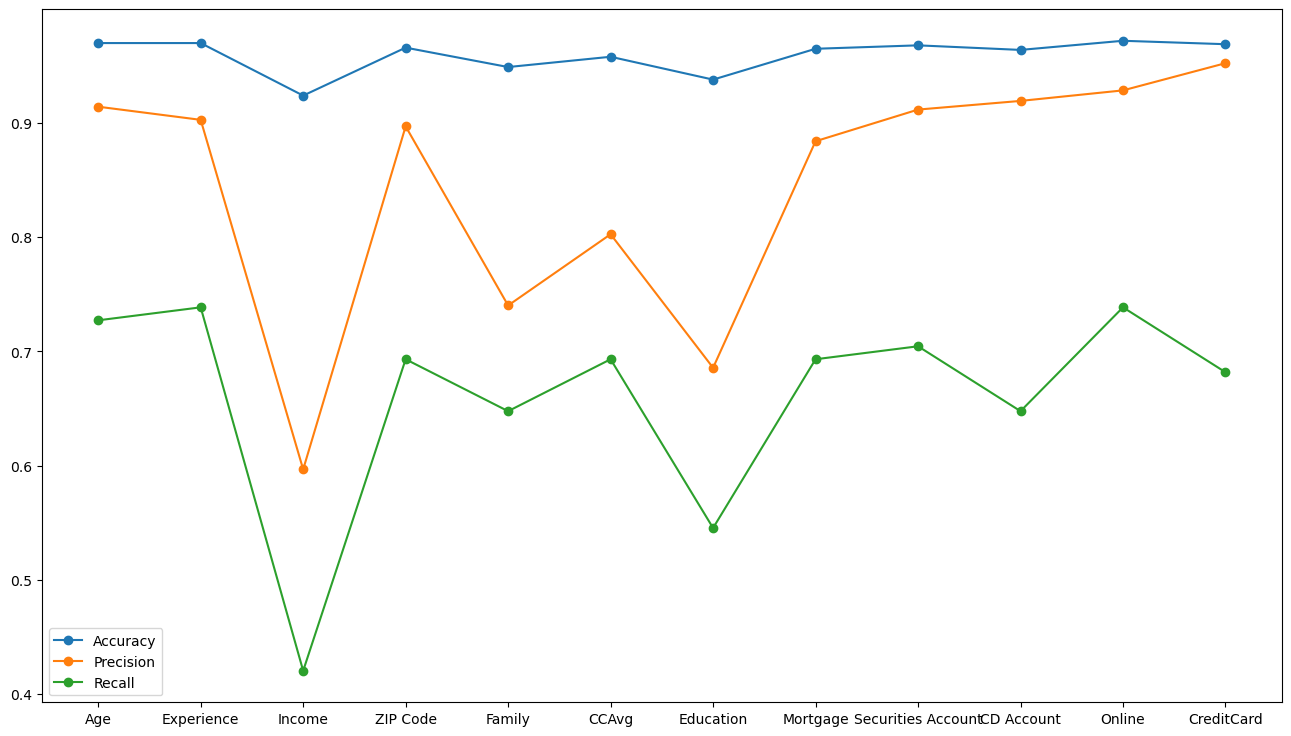

0.972


In [34]:
from sklearn.model_selection import train_test_split

atribute =[ 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
accuracies = []
precisions = []
recalls = []

for element in atribute:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    X_train = X_train.drop([element], axis=1)
    X_test = X_test.drop([element], axis=1)
    knn_classifier = KNeighborsClassifier(n_neighbors = k_best, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_knn))
    precisions.append(precision_score(y_test, y_pred_knn))
    recalls.append(recall_score(y_test, y_pred_knn))

plt.figure(figsize=(16,9))
plt.plot(atribute, accuracies, label='Accuracy', marker='o')
plt.plot(atribute, precisions, label='Precision', marker='o')
plt.plot(atribute, recalls, label='Recall', marker='o')
plt.legend()
plt.show()

drop_atribute = atribute[np.argmax(accuracies)]
print(accuracies[np.argmax(accuracies)])

## Lựa chọn hàm tính khoảng cách
- Hàm tính khoảng cách: minkowski, manhattan, euclidean, chebyshev
- Hàm tính khoảng cách nào là tốt nhất cho bài toán này ?

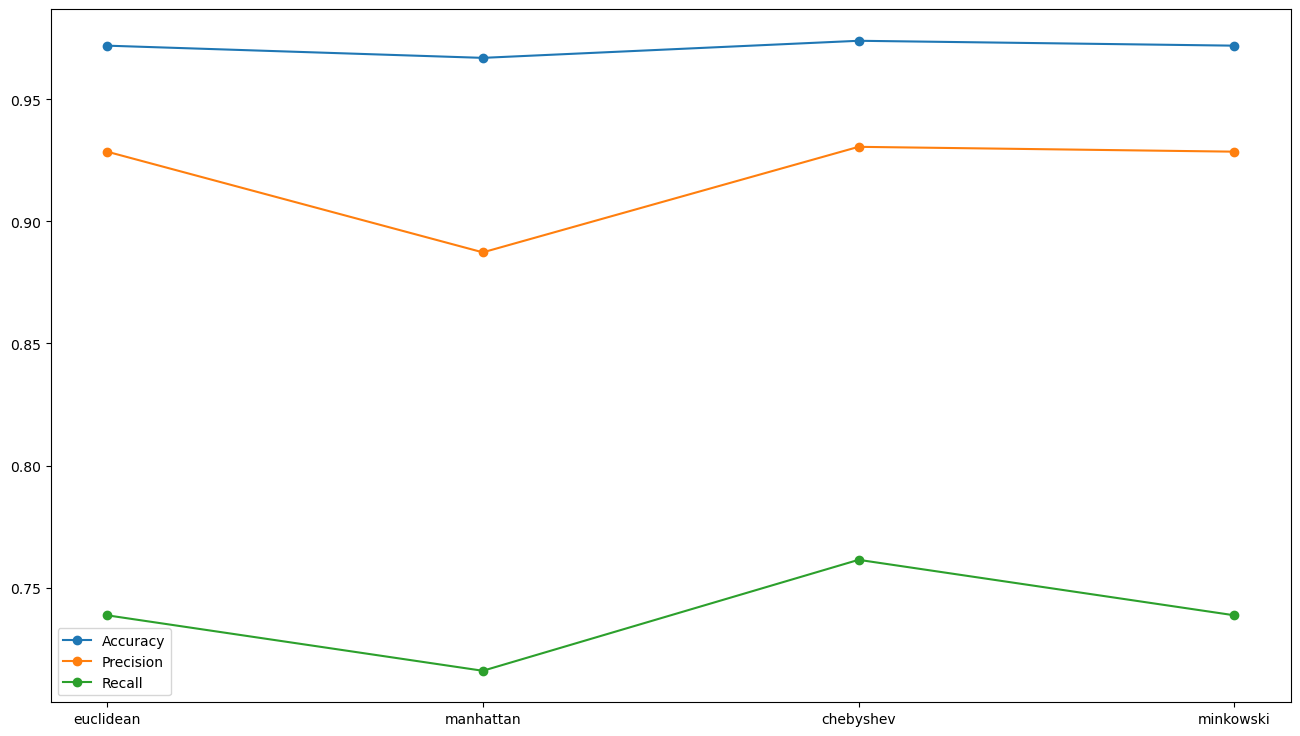

0.974
chebyshev


In [37]:
distance = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
accuracies = []
precisions = []
recalls = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train = X_train.drop([drop_atribute], axis=1)
for element in distance:
    knn_classifier = KNeighborsClassifier(n_neighbors = k_best, metric = element, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test.drop([drop_atribute], axis=1))
    accuracies.append(accuracy_score(y_test, y_pred_knn))
    precisions.append(precision_score(y_test, y_pred_knn))
    recalls.append(recall_score(y_test, y_pred_knn))

plt.figure(figsize=(16,9))
plt.plot(distance, accuracies, label='Accuracy', marker='o')
plt.plot(distance, precisions, label='Precision', marker='o')
plt.plot(distance, recalls, label='Recall', marker='o')
plt.legend()
plt.show()

print(accuracies[np.argmax(accuracies)])

best_distance = distance[np.argmax(accuracies)]
print(best_distance)
    

In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors = k_best, metric = best_distance, weights = 'distance')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train = X_train.drop([drop_atribute], axis=1)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test.drop([drop_atribute], axis=1))
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))





Accuracy:  0.974
